# r-band magnitude Mr < 17.77,  Z < 0.24

In [2]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

# File name
file_name = 'NSA_v1_0_1_VAGC_vflag-V2-VF_updated.fits'

# Inspect the structure of the file and extract data as a table
with fits.open(file_name) as hdul:
    hdul.info()

    data_hdu = hdul[1].data 

    data = Table(data_hdu)

# Display the first five rows as a table
data[:5]


Filename: NSA_v1_0_1_VAGC_vflag-V2-VF_updated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    358   641409R x 144C   [19A, 27A, D, D, J, J, J, J, J, J, E, E, 7A, E, I, B, I, 3A, E, E, J, E, 7E, 7E, I, 7E, 7E, 7E, 7E, 7E, 5E, 7E, E, E, E, E, D, D, 7B, 105E, 105E, 105E, 105E, 105E, 105E, 7E, 7E, 7E, 7E, E, E, E, E, 7E, 7E, E, E, E, 7E, 7E, 7J, J, J, 8A, 15E, E, E, E, E, J, I, J, D, D, E, 6A, 27A, 8A, J, D, D, E, E, E, E, E, E, E, E, 7E, 7E, 7E, 7E, E, 7E, 7E, 7E, 7E, I, 7E, 7E, 7E, 7E, 5E, E, 7E, E, E, E, D, E, E, E, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K, D, D, D]   


IAUNAME,SUBDIR,RA,DEC,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,NSAID,ZDIST,SERSIC_NMGY,SERSIC_NMGY_IVAR,SERSIC_OK,SERSIC_RNMGY,SERSIC_ABSMAG,SERSIC_AMIVAR,EXTINCTION,SERSIC_KCORRECT,SERSIC_KCOEFF,SERSIC_MTOL,SERSIC_B300,SERSIC_B1000,SERSIC_METS,SERSIC_MASS,XCEN,YCEN,NPROF,PROFMEAN,PROFMEAN_IVAR,QSTOKES,USTOKES,BASTOKES,PHISTOKES,PETRO_FLUX,PETRO_FLUX_IVAR,FIBER_FLUX,FIBER_FLUX_IVAR,PETRO_BA50,PETRO_PHI50,PETRO_BA90,PETRO_PHI90,SERSIC_FLUX,SERSIC_FLUX_IVAR,SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY,CLUMPY,DFLAGS,AID,PID,DVERSION,PROFTHETA,PETRO_THETA,PETRO_TH50,PETRO_TH90,SERSIC_TH50,PLATE,FIBERID,MJD,RACAT,DECCAT,ZSDSSLINE,SURVEY,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC,ELPETRO_BA,ELPETRO_PHI,ELPETRO_FLUX_R,ELPETRO_FLUX_IVAR_R,ELPETRO_THETA_R,ELPETRO_TH50_R,ELPETRO_TH90_R,ELPETRO_THETA,ELPETRO_FLUX,ELPETRO_FLUX_IVAR,ELPETRO_TH50,ELPETRO_TH90,ELPETRO_APCORR_R,ELPETRO_APCORR,ELPETRO_APCORR_SELF,ELPETRO_NMGY,ELPETRO_NMGY_IVAR,ELPETRO_OK,ELPETRO_RNMGY,ELPETRO_ABSMAG,ELPETRO_AMIVAR,ELPETRO_KCORRECT,ELPETRO_KCOEFF,ELPETRO_MASS,ELPETRO_MTOL,ELPETRO_B300,ELPETRO_B1000,ELPETRO_METS,IN_DR7_LSS,u_r,g_r,NUV_r,index,imc,aimc,cd,conx1,u_r_KIAS,prmag,BPTclass,SFR,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,N12logNH,NHerr,logNO,NOerr,Ne12logNeH,NeHerr,logNeO,NeOerr,Z_N2O2,vorvol,V2_depth,vflag_V2,vflag_VF,u_r_err,g_r_err,NUV_r_err
str19,str27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,str7,float32,int16,uint8,int16,str3,float32,float32,int32,float32,float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[7],float32[5],float32[7],float32,float32,float32,float32,float64,float64,uint8[7],"float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]",float32[7],float32[7],float32[7],float32[7],float32,float32,float32,float32,float32[7],float32[7],float32,float32,float32,float32[7],float32[7],int32[7],int32,int32,str8,float32[15],float32,float32,float32,float32,int32,int16,int32,float64,float64,float32,str6,str27,str8,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],float32[7],float32[7],float32[7],float32,float32[7],float32[7],float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[5],float32,float32[7],float32,float32,float32,float64,float32,float32,float32,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64
J094651.40-010228.5,09h/m00/J094651.40-010228.5,146.714215072841,-1.0412800233313741,0,72212,37354,-1,-1,-1,15.178774,0.021222278,sdss,0.07,756,1,206,301,136.2967,1095.152,0,0.020687785,29.696056 .. 3267.6895,0.29814342 .. 0.00012172792,1,31.368013 .. 3501.2527,-15.17281 .. -20.302134,223.03555 .. 1102.6129,0.4536473 .. 0.080934174,-0.005893635 .. 0.019576037,0.00017777947 .. 5.1533486e-11,0.00020792194 .. 0.98780394,2.7473723e-05,0.31195974,0.035135116,8898397000.0,215.39407348632812,213.4535369873047,10 .. 12,0.3149959 .. 0.0,233.37904 .. 0.0,0.062215745 .. -0.07950058,0.0006146176 .. -0.1274703,0.8828513 .. 0.7387829,0.2829979 .. -60.97547,18.203371 .. 2264.6604,1.9946122 .. 0.015697604,1.0260131 .. 561.97687,47.3397 .. 0.33574256,0.88909996,14.777527,0.80408496,17.367554,19.554192 .. 3146.785,1.0691423 .. 0.017162137,4.7761517,0.6651653,15.97821,-0.0109440535 .. 0.004525926,0.042470127 .. 0.042621203,0 .. 0,0,36,v2_1_13,0.22341923 .. 258.39,7.2478933,3.4641922,10.453795,5.882104,266,1,51630,146.71420341874853,-1.0412749124036818,0.0,sdss,legacy,good,122,146.71421,-1.0413043,0.80408496,17.367554,1144.0713,0.4582725,7.3913364,3.7061903,10.666219,7.3913364,18.787916 .. 2225.009,1.8480047 .. 0.017611798,5.8557696 .. 3.4004514,11.650886 .. 10.1460905,0.9986329,1.0687045 .. 1.001099,1.0695114 .. 1.0010818,28.532349 .. 2310.4973,0.42499655 .. 0.00024172392,1,28.661

In [3]:
catalog_SDSS = data[data['IN_DR7_LSS'] == 1]

ra_boolean = np.logical_and(catalog_SDSS['RA'] > 110, catalog_SDSS['RA'] < 270)
catalog_north = catalog_SDSS[ra_boolean]

strip_boolean = np.logical_and.reduce([catalog_north['RA'] > 250,
                                       catalog_north['RA'] < 269,
                                       catalog_north['DEC'] > 51,
                                       catalog_north['DEC'] < 67])
catalog_main = catalog_north[~strip_boolean]      #exclude rows where strip_boolean is True
del catalog_north


In [4]:
additional_condition = np.logical_and(catalog_main['Z'] < 0.12, catalog_main['MAG'] < 17.8)
catalog_main = catalog_main[additional_condition]

In [5]:
Mstar_NSA = np.log10(catalog_main['ELPETRO_MASS'])
gr_NSA = np.array(catalog_main['g_r'])
ur_NSA = np.array(catalog_main['u_r'])
rabsmag_NSA = np.array(catalog_main['ELPETRO_ABSMAG'][:,4])
SFR = np.array(catalog_main['SFR'])
sSFR = np.array(catalog_main['sSFR'])

/tmp/ipykernel_259822/1261408630.py:1: RuntimeWarning: divide by zero encountered in log10
  Mstar_NSA = np.log10(catalog_main['ELPETRO_MASS'])


In [6]:
wall_vf = catalog_main['vflag_VF'] == 0
void_vf = catalog_main['vflag_VF'] == 1
edge_vf = catalog_main['vflag_VF'] == 2
out_vf = catalog_main['vflag_VF'] == 9
#catalog_main, data     

In [7]:
valid_vf = wall_vf | void_vf | edge_vf

# 1. Stellar Mass
clean_wall_vf = Mstar_NSA[wall_vf][~np.isnan(Mstar_NSA[wall_vf]) & ~np.isinf(Mstar_NSA[wall_vf]) & (Mstar_NSA[wall_vf] != 0)]
clean_void_vf = Mstar_NSA[void_vf][~np.isnan(Mstar_NSA[void_vf]) & ~np.isinf(Mstar_NSA[void_vf]) & (Mstar_NSA[void_vf] != 0)]
Mstar_NSA = Mstar_NSA[valid_vf][~np.isnan(Mstar_NSA[valid_vf]) & ~np.isinf(Mstar_NSA[valid_vf]) & (Mstar_NSA[valid_vf] != 0)]

# 2. g - r
cleangr_wall_vf = gr_NSA[wall_vf][~np.isnan(gr_NSA[wall_vf]) & ~np.isinf(gr_NSA[wall_vf]) & (gr_NSA[wall_vf] != 0)]
cleangr_void_vf = gr_NSA[void_vf][~np.isnan(gr_NSA[void_vf]) & ~np.isinf(gr_NSA[void_vf]) & (gr_NSA[void_vf] != 0)]
gr_NSA = gr_NSA[valid_vf][~np.isnan(gr_NSA[valid_vf]) & ~np.isinf(gr_NSA[valid_vf]) & (gr_NSA[valid_vf] != 0)]

# 3. u - r
cleanur_wall_vf = ur_NSA[wall_vf][~np.isnan(ur_NSA[wall_vf]) & ~np.isinf(ur_NSA[wall_vf]) & (ur_NSA[wall_vf] != 0)]
cleanur_void_vf = ur_NSA[void_vf][~np.isnan(ur_NSA[void_vf]) & ~np.isinf(ur_NSA[void_vf]) & (ur_NSA[void_vf] != 0)]
ur_NSA = ur_NSA[valid_vf][~np.isnan(ur_NSA[valid_vf]) & ~np.isinf(ur_NSA[valid_vf]) & (ur_NSA[valid_vf] != 0)]

# 4. Absolute Magnitude
cleanmag_wall_vf = rabsmag_NSA[wall_vf][~np.isnan(rabsmag_NSA[wall_vf]) & ~np.isinf(rabsmag_NSA[wall_vf]) & (rabsmag_NSA[wall_vf] != 0)]
cleanmag_void_vf = rabsmag_NSA[void_vf][~np.isnan(rabsmag_NSA[void_vf]) & ~np.isinf(rabsmag_NSA[void_vf]) & (rabsmag_NSA[void_vf] != 0)]
rabsmag_NSA = rabsmag_NSA[valid_vf][~np.isnan(rabsmag_NSA[valid_vf]) & ~np.isinf(rabsmag_NSA[valid_vf]) & (rabsmag_NSA[valid_vf] != 0)]

# 5. SFR
cleanSFR_wall_vf = SFR[wall_vf][~np.isnan(SFR[wall_vf]) & ~np.isinf(SFR[wall_vf]) & (SFR[wall_vf] != 0)]
cleanSFR_void_vf = SFR[void_vf][~np.isnan(SFR[void_vf]) & ~np.isinf(SFR[void_vf]) & (SFR[void_vf] != 0)]
SFR = SFR[valid_vf][~np.isnan(SFR[valid_vf]) & ~np.isinf(SFR[valid_vf]) & (SFR[valid_vf] != 0)]

# 6. sSFR
cleansSFR_wall_vf = sSFR[wall_vf][~np.isnan(sSFR[wall_vf]) & ~np.isinf(sSFR[wall_vf]) & (sSFR[wall_vf] != 0)]
cleansSFR_void_vf = sSFR[void_vf][~np.isnan(sSFR[void_vf]) & ~np.isinf(sSFR[void_vf]) & (sSFR[void_vf] != 0)]
sSFR = sSFR[valid_vf][~np.isnan(sSFR[valid_vf]) & ~np.isinf(sSFR[valid_vf]) & (sSFR[valid_vf] != 0)]


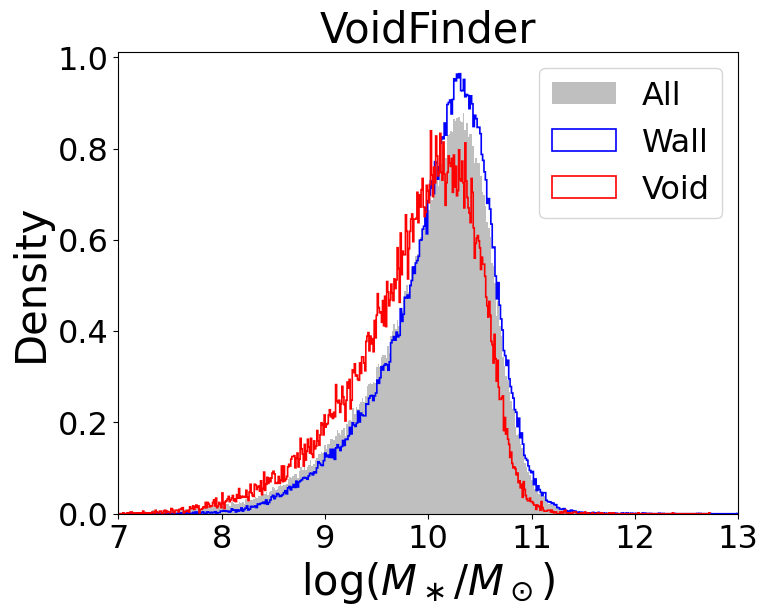

In [8]:
plt.rcParams.update({'font.size': 23})
size = 30

plt.figure(figsize=(8, 6))
plt.hist(Mstar_NSA, bins=800, density=True, alpha=0.5, color='gray', label='All')
plt.hist(clean_wall_vf, bins=800, density=True, histtype='step', linewidth=1.2, color='blue', label='Wall')
plt.hist(clean_void_vf, bins=800, density=True, histtype='step', linewidth=1.2, color='red', label='Void')

plt.xlabel(r"$\log(M_\ast/M_\odot)$", fontsize=size)
plt.ylabel("Density", fontsize=size)
plt.title("VoidFinder", fontsize=size)
plt.legend()
plt.xlim(7, 13)
#plt.tight_layout()
plt.savefig("SDSS_VF_absmaga.pdf", bbox_inches='tight')
plt.show()

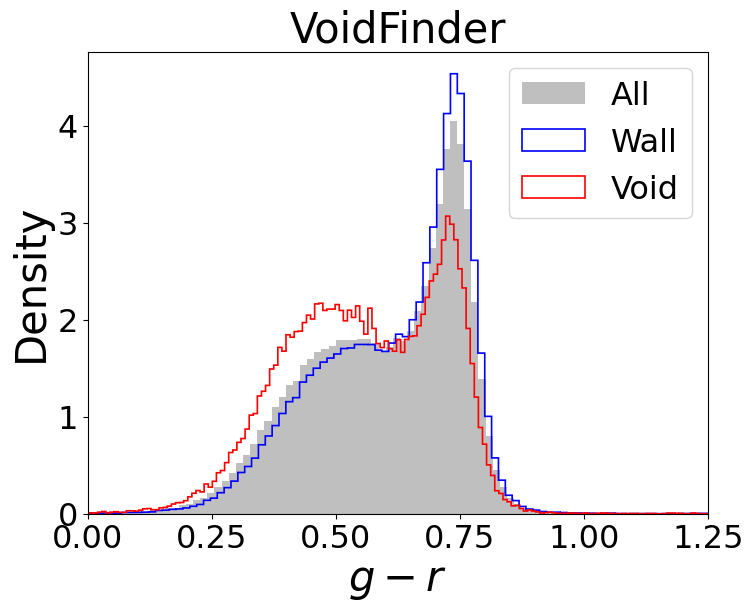

In [9]:
plt.rcParams.update({'font.size': 23})
size = 30

plt.figure(figsize=(8, 6))
plt.hist(gr_NSA, bins=1000, density=True, alpha=0.5, color='gray', label='All')
plt.hist(cleangr_wall_vf, bins=1000, density=True, histtype='step', linewidth=1.2, color='blue', label='Wall')
plt.hist(cleangr_void_vf, bins=1000, density=True, histtype='step', linewidth=1.2, color='red', label='Void')

plt.xlabel(r"$g-r$", fontsize=size)
plt.ylabel("Density", fontsize=size)
plt.title("VoidFinder", fontsize=size)
plt.legend()
plt.xlim(0, 1.25)
# plt.tight_layout()  # 可选
plt.savefig("SDSS_VF_gr.pdf", bbox_inches='tight')
plt.show()


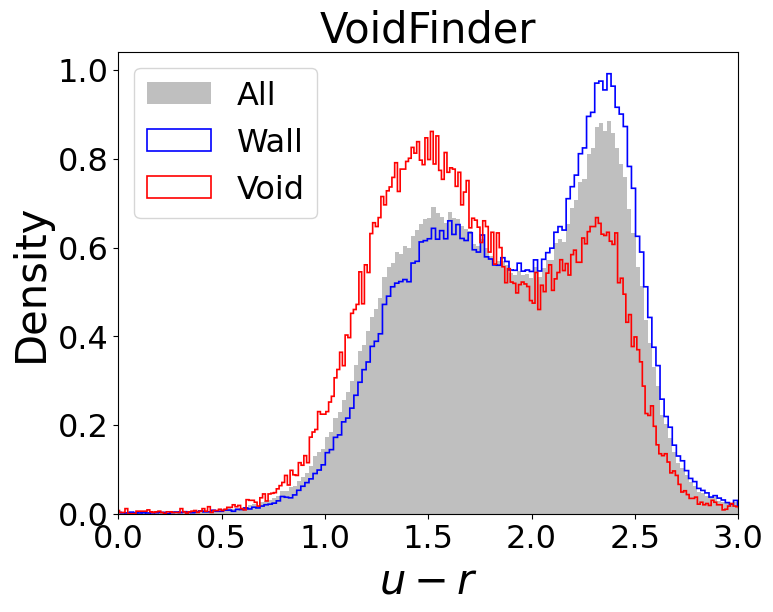

In [10]:
plt.rcParams.update({'font.size': 23})
size = 30

plt.figure(figsize=(8, 6))
plt.hist(ur_NSA, bins=800, density=True, alpha=0.5, color='gray', label='All')
plt.hist(cleanur_wall_vf, bins=800, density=True, histtype='step', linewidth=1.2, color='blue', label='Wall')
plt.hist(cleanur_void_vf, bins=800, density=True, histtype='step', linewidth=1.2, color='red', label='Void')

plt.xlabel(r"$u-r$", fontsize=size)
plt.ylabel("Density", fontsize=size)
plt.title("VoidFinder", fontsize=size)
plt.legend()
plt.xlim(0, 3)
# plt.tight_layout()  # 可选
plt.savefig("SDSS_VF_ur.pdf", bbox_inches='tight')
plt.show()


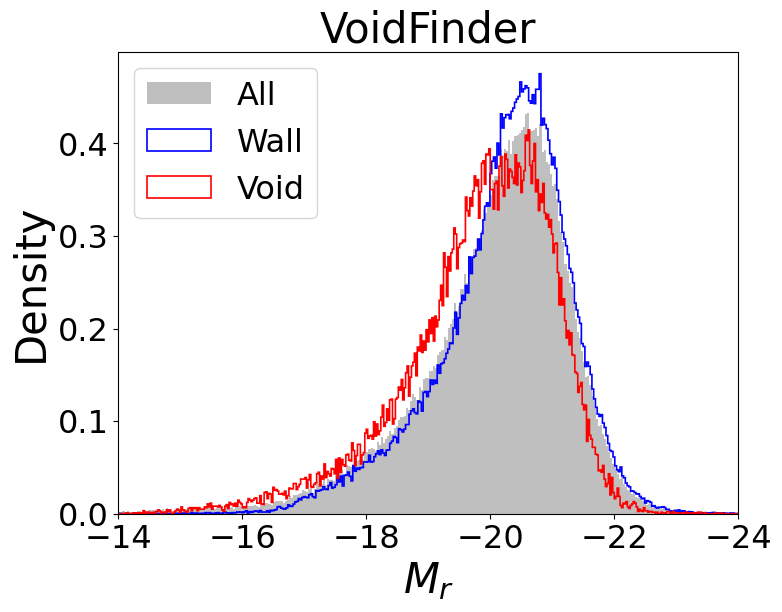

In [11]:
plt.rcParams.update({'font.size': 23})
size = 30

plt.figure(figsize=(8, 6))
plt.hist(rabsmag_NSA, bins=800, density=True, alpha=0.5, color='gray', label='All')
plt.hist(cleanmag_wall_vf, bins=800, density=True, histtype='step', linewidth=1.2, color='blue', label='Wall')
plt.hist(cleanmag_void_vf, bins=800, density=True, histtype='step', linewidth=1.2, color='red', label='Void')

plt.xlabel(r"$M_r$", fontsize=size)
plt.ylabel("Density", fontsize=size)
plt.title("VoidFinder", fontsize=size)
plt.legend()
plt.xlim(-14, -24)
plt.savefig("SDSS_VF_absmagr.pdf", bbox_inches='tight')
plt.show()


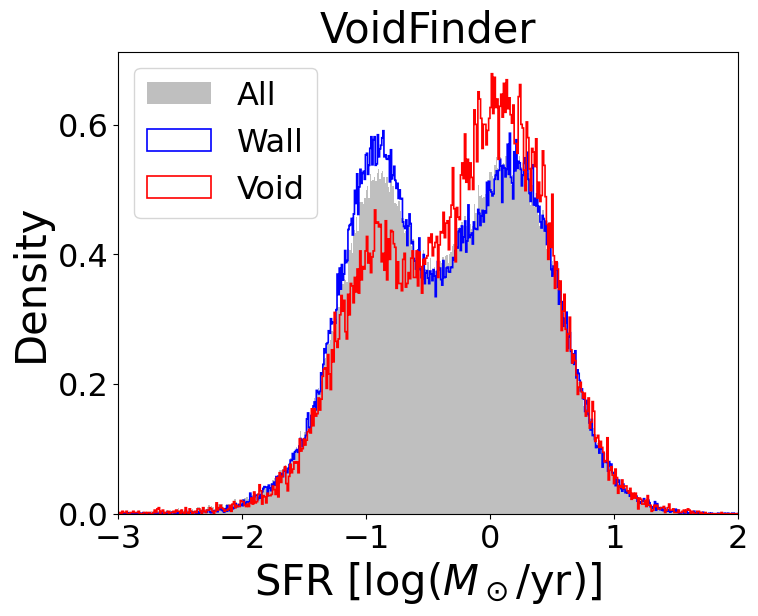

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(SFR, bins=800, density=True, alpha=0.5, color='gray', label='All')
plt.hist(cleanSFR_wall_vf, bins=800, density=True, histtype='step', linewidth=1.2, color='blue', label='Wall')
plt.hist(cleanSFR_void_vf, bins=800, density=True, histtype='step', linewidth=1.2, color='red', label='Void')

plt.xlabel(r"SFR [log$(M_\odot$/yr)]", fontsize=size)
plt.ylabel("Density", fontsize=size)
plt.title("VoidFinder", fontsize=size)
plt.legend()
plt.xlim(-3, 2)
plt.savefig("SDSS_VF_SFR.pdf", bbox_inches='tight')
plt.show()


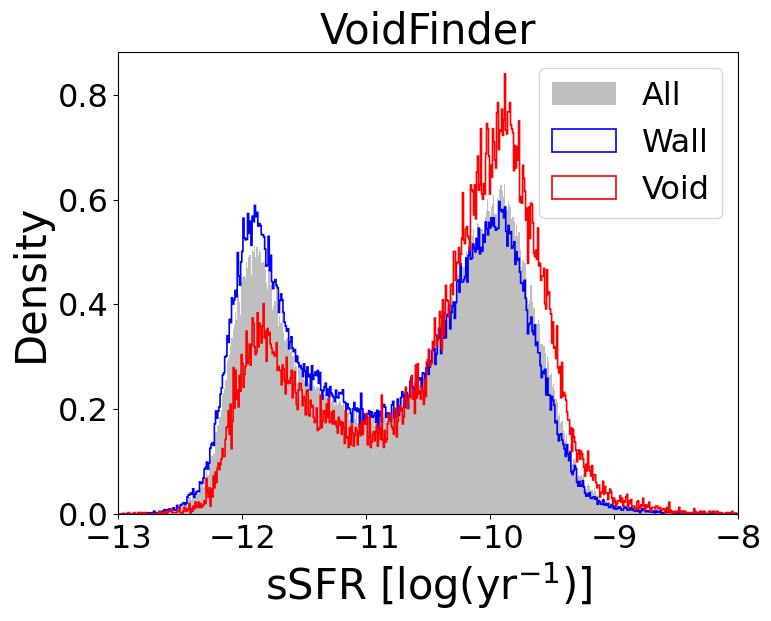

In [13]:
plt.rcParams.update({'font.size': 23})
size = 30

plt.figure(figsize=(8, 6))
plt.hist(sSFR, bins=800, density=True, alpha=0.5, color='gray', label='All')
plt.hist(cleansSFR_wall_vf, bins=800, density=True, histtype='step', linewidth=1.2, color='blue', label='Wall')
plt.hist(cleansSFR_void_vf, bins=800, density=True, histtype='step', linewidth=1.2, color='red', label='Void')

plt.xlabel(r"sSFR [log(yr$^{-1}$)]", fontsize=size)
plt.ylabel("Density", fontsize=size)
plt.title("VoidFinder", fontsize=size)
plt.legend()
plt.xlim(-13, -8)
#plt.tight_layout()
plt.savefig("SDSS_VF_sSFR.pdf", bbox_inches='tight')
plt.show()
